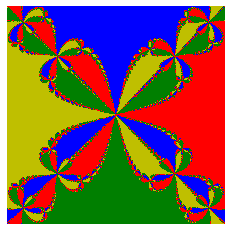

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)


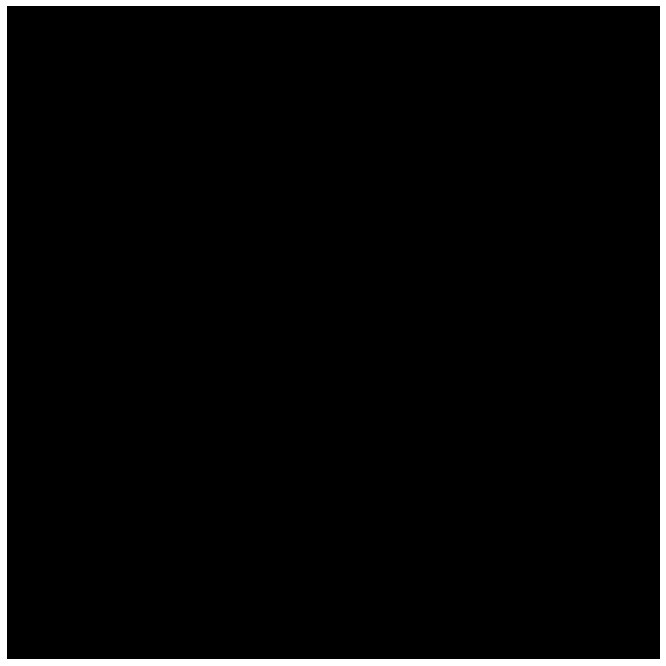

In [5]:
npts = 512
max_iter = 20

X = np.linspace(-2, 2, npts)
Y = np.linspace(-2, 2, npts)

#broadcast the xs to a square array
C = X[:, None] + 1J*Y
#initial value is always zero
Z = np.copy(C)

exit_times = max_iter * np.ones(C.shape, np.int8)
mask = exit_times > 0

for k in range(max_iter):
    C = C - (C**3 - 1)/ 3 / C**2

Z = np.zeros_like(C)
#r,g,b layers are all the same
image = np.stack((,)*3).T
#choose a coloring scheme now
image = 1 - image/max_iter

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.axis('off')
ax.set_aspect(1) 
u = ax.imshow(image)